11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training MLP (Depth=1, Width=128)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training MLP (Depth=2, Width=128)...
Training MLP (Depth=3, Width=128)...
Training MLP (Depth=4, Width=128)...
Training MLP (Depth=5, Width=128)...
Training MLP (Depth=3, Width=32)...
Training MLP (Depth=3, Width=64)...
Training MLP (Depth=3, Width=128)...
Training MLP (Depth=3, Width=256)...
Training MLP (Depth=3, Width=512)...


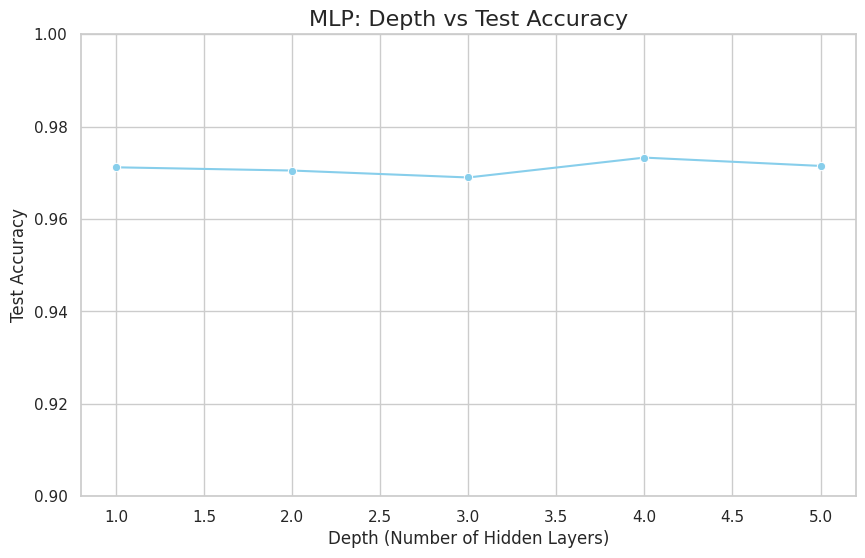

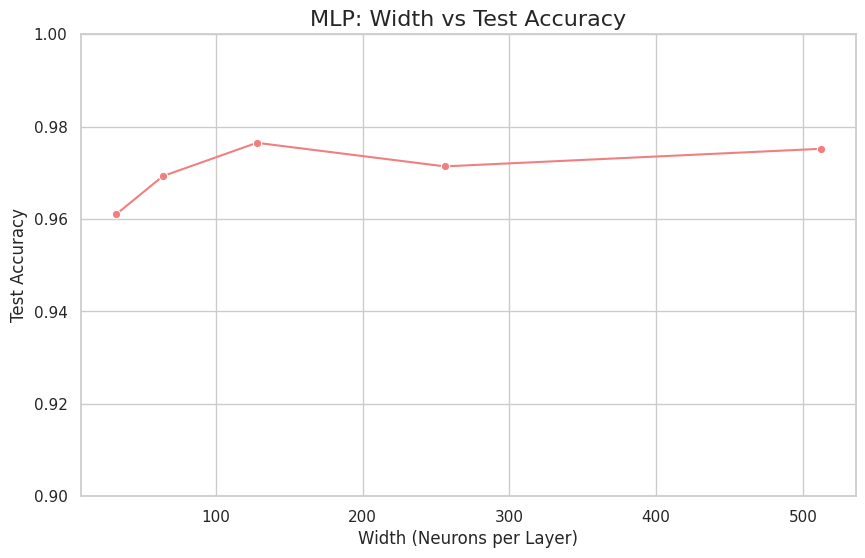

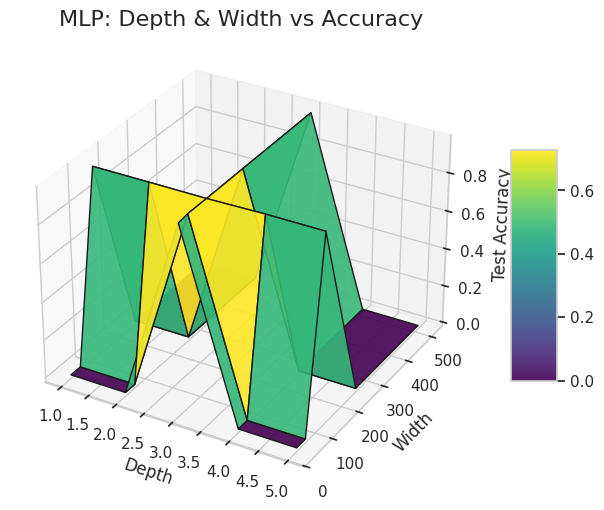

Training CNN (Conv Layers=1, Filters=32)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN (Conv Layers=2, Filters=32)...
Training CNN (Conv Layers=3, Filters=32)...
Training CNN (Conv Layers=4, Filters=32)...
Training CNN (Conv Layers=3, Filters=16)...
Training CNN (Conv Layers=3, Filters=32)...
Training CNN (Conv Layers=3, Filters=64)...
Training CNN (Conv Layers=3, Filters=128)...


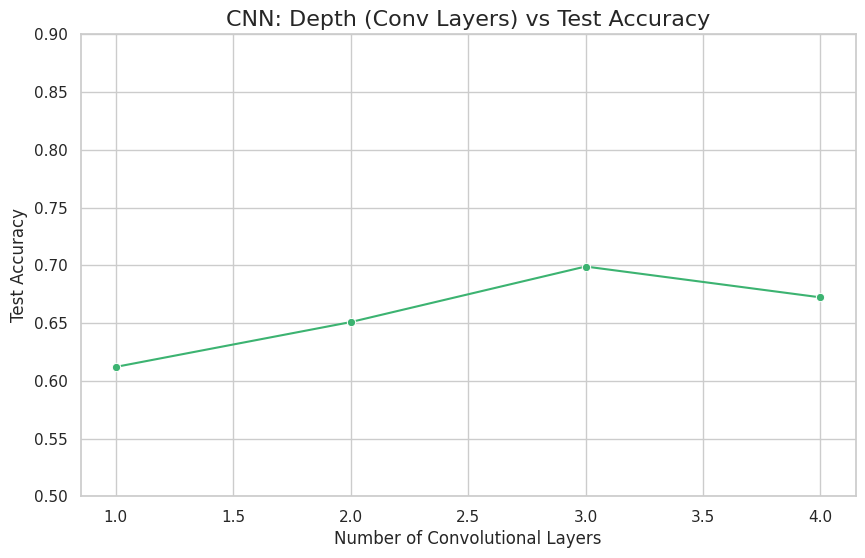

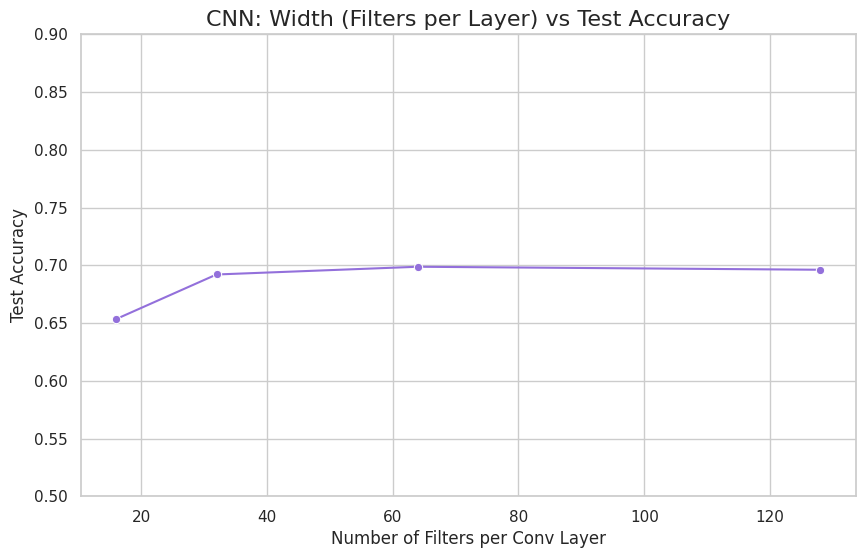

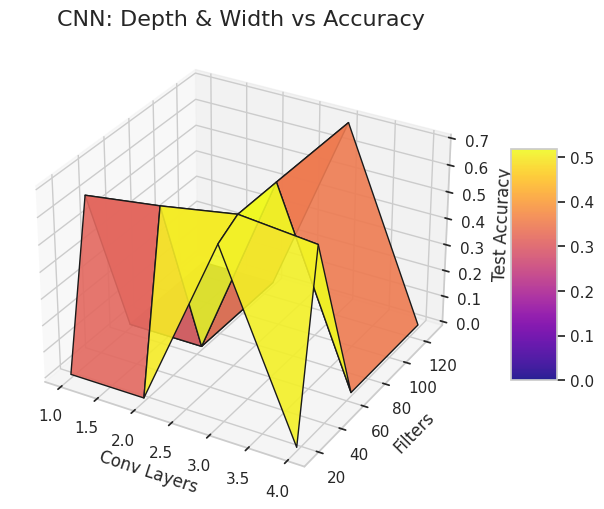

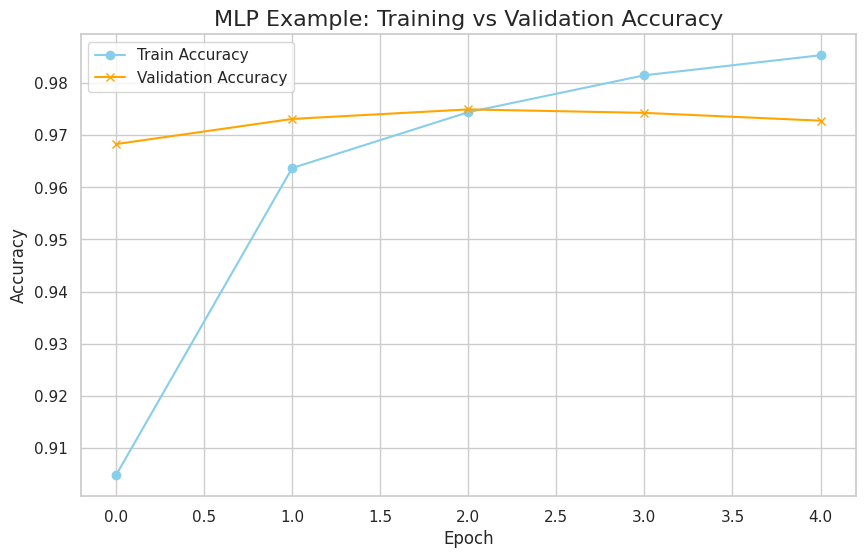

In [1]:
# ###############################################################
# MLP and CNN Hyperparameter Analysis
# Focus: Depth vs Width vs Accuracy
# Datasets: MNIST (MLP), CIFAR-10 (CNN)
# Author: Shahab Zaman
# Date: 2025-12-10
# ###############################################################

# ------------------------------
# 1. Setup & Imports
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10

# Set random seed for reproducibility
np.random.seed(7)
tf.random.set_seed(7)

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 14

# ------------------------------
# 2. Load and Preprocess Datasets
# ------------------------------

# ----- MNIST for MLP -----
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = mnist.load_data()
X_mnist_train = X_mnist_train.astype('float32') / 255.0
X_mnist_test  = X_mnist_test.astype('float32') / 255.0
y_mnist_train = to_categorical(y_mnist_train, 10)
y_mnist_test  = to_categorical(y_mnist_test, 10)
X_mnist_train_flat = X_mnist_train.reshape(-1, 28*28)
X_mnist_test_flat  = X_mnist_test.reshape(-1, 28*28)

# ----- CIFAR-10 for CNN -----
(X_cifar_train, y_cifar_train), (X_cifar_test, y_cifar_test) = cifar10.load_data()
X_cifar_train = X_cifar_train.astype('float32') / 255.0
X_cifar_test  = X_cifar_test.astype('float32') / 255.0
y_cifar_train = to_categorical(y_cifar_train, 10)
y_cifar_test  = to_categorical(y_cifar_test, 10)

# ------------------------------
# 3. Functions: Model Builders
# ------------------------------

# Function to create MLP dynamically
def create_mlp(input_dim, num_classes, depth=2, width=128):
    model = Sequential()
    model.add(Dense(width, activation='relu', input_dim=input_dim))
    for _ in range(depth-1):
        model.add(Dense(width, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to create CNN dynamically
def create_cnn(input_shape, num_classes, conv_layers=2, filters=32):
    model = Sequential()
    model.add(Conv2D(filters, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2,2)))
    for _ in range(conv_layers-1):
        model.add(Conv2D(filters, (3,3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------
# 4. MLP Experiments
# ------------------------------

# ----- Varying Depth (fix width) -----
mlp_depths = [1, 2, 3, 4, 5]
fixed_width = 128
mlp_depth_results = []

for d in mlp_depths:
    print(f"Training MLP (Depth={d}, Width={fixed_width})...")
    model = create_mlp(input_dim=28*28, num_classes=10, depth=d, width=fixed_width)
    history = model.fit(X_mnist_train_flat, y_mnist_train, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
    test_acc = model.evaluate(X_mnist_test_flat, y_mnist_test, verbose=0)[1]
    mlp_depth_results.append({'Depth': d, 'Width': fixed_width, 'Test Accuracy': test_acc, 'History': history})

mlp_depth_df = pd.DataFrame(mlp_depth_results)

# ----- Varying Width (fix depth) -----
mlp_widths = [32, 64, 128, 256, 512]
fixed_depth = 3
mlp_width_results = []

for w in mlp_widths:
    print(f"Training MLP (Depth={fixed_depth}, Width={w})...")
    model = create_mlp(input_dim=28*28, num_classes=10, depth=fixed_depth, width=w)
    history = model.fit(X_mnist_train_flat, y_mnist_train, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
    test_acc = model.evaluate(X_mnist_test_flat, y_mnist_test, verbose=0)[1]
    mlp_width_results.append({'Depth': fixed_depth, 'Width': w, 'Test Accuracy': test_acc, 'History': history})

mlp_width_df = pd.DataFrame(mlp_width_results)

# ------------------------------
# 5. MLP Visualizations
# ------------------------------

# Depth vs Accuracy
plt.figure()
sns.lineplot(data=mlp_depth_df, x='Depth', y='Test Accuracy', marker='o', color='skyblue')
plt.title('MLP: Depth vs Test Accuracy', fontsize=16)
plt.xlabel('Depth (Number of Hidden Layers)')
plt.ylabel('Test Accuracy')
plt.ylim(0.90,1.0)
plt.grid(True)
plt.show()

# Width vs Accuracy
plt.figure()
sns.lineplot(data=mlp_width_df, x='Width', y='Test Accuracy', marker='o', color='lightcoral')
plt.title('MLP: Width vs Test Accuracy', fontsize=16)
plt.xlabel('Width (Neurons per Layer)')
plt.ylabel('Test Accuracy')
plt.ylim(0.90,1.0)
plt.grid(True)
plt.show()

# 3D Surface Plot: Depth & Width vs Accuracy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create grid
depth_grid, width_grid = np.meshgrid(mlp_depths, mlp_widths)
accuracy_grid = np.zeros_like(depth_grid, dtype=float)

# Fill accuracy grid
for i, w in enumerate(mlp_widths):
    for j, d in enumerate(mlp_depths):
        if w==fixed_width:
            accuracy_grid[i,j] = mlp_depth_df.loc[mlp_depth_df['Depth']==d,'Test Accuracy'].values[0]
        elif d==fixed_depth:
            accuracy_grid[i,j] = mlp_width_df.loc[mlp_width_df['Width']==w,'Test Accuracy'].values[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(depth_grid, width_grid, accuracy_grid, cmap=cm.viridis, edgecolor='k', alpha=0.9)
ax.set_xlabel('Depth')
ax.set_ylabel('Width')
ax.set_zlabel('Test Accuracy')
ax.set_title('MLP: Depth & Width vs Accuracy', fontsize=16)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# ------------------------------
# 6. CNN Experiments
# ------------------------------

# ----- Varying Depth (conv_layers) -----
cnn_depths = [1, 2, 3, 4]
fixed_filters = 32
cnn_depth_results = []

for d in cnn_depths:
    print(f"Training CNN (Conv Layers={d}, Filters={fixed_filters})...")
    model = create_cnn(input_shape=(32,32,3), num_classes=10, conv_layers=d, filters=fixed_filters)
    history = model.fit(X_cifar_train, y_cifar_train, epochs=10, batch_size=64, verbose=0, validation_split=0.1)
    test_acc = model.evaluate(X_cifar_test, y_cifar_test, verbose=0)[1]
    cnn_depth_results.append({'Conv Layers': d, 'Filters': fixed_filters, 'Test Accuracy': test_acc, 'History': history})

cnn_depth_df = pd.DataFrame(cnn_depth_results)

# ----- Varying Width (filters) -----
cnn_filters = [16, 32, 64, 128]
fixed_conv_layers = 3
cnn_width_results = []

for f in cnn_filters:
    print(f"Training CNN (Conv Layers={fixed_conv_layers}, Filters={f})...")
    model = create_cnn(input_shape=(32,32,3), num_classes=10, conv_layers=fixed_conv_layers, filters=f)
    history = model.fit(X_cifar_train, y_cifar_train, epochs=10, batch_size=64, verbose=0, validation_split=0.1)
    test_acc = model.evaluate(X_cifar_test, y_cifar_test, verbose=0)[1]
    cnn_width_results.append({'Conv Layers': fixed_conv_layers, 'Filters': f, 'Test Accuracy': test_acc, 'History': history})

cnn_width_df = pd.DataFrame(cnn_width_results)

# ------------------------------
# 7. CNN Visualizations
# ------------------------------

# Depth vs Accuracy
plt.figure()
sns.lineplot(data=cnn_depth_df, x='Conv Layers', y='Test Accuracy', marker='o', color='mediumseagreen')
plt.title('CNN: Depth (Conv Layers) vs Test Accuracy', fontsize=16)
plt.xlabel('Number of Convolutional Layers')
plt.ylabel('Test Accuracy')
plt.ylim(0.50,0.90)
plt.grid(True)
plt.show()

# Width vs Accuracy
plt.figure()
sns.lineplot(data=cnn_width_df, x='Filters', y='Test Accuracy', marker='o', color='mediumpurple')
plt.title('CNN: Width (Filters per Layer) vs Test Accuracy', fontsize=16)
plt.xlabel('Number of Filters per Conv Layer')
plt.ylabel('Test Accuracy')
plt.ylim(0.50,0.90)
plt.grid(True)
plt.show()

# 3D Surface Plot: Conv Layers & Filters vs Accuracy
depth_grid_cnn, width_grid_cnn = np.meshgrid(cnn_depths, cnn_filters)
accuracy_grid_cnn = np.zeros_like(depth_grid_cnn, dtype=float)

for i, f in enumerate(cnn_filters):
    for j, d in enumerate(cnn_depths):
        if f==fixed_filters:
            accuracy_grid_cnn[i,j] = cnn_depth_df.loc[cnn_depth_df['Conv Layers']==d,'Test Accuracy'].values[0]
        elif d==fixed_conv_layers:
            accuracy_grid_cnn[i,j] = cnn_width_df.loc[cnn_width_df['Filters']==f,'Test Accuracy'].values[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(depth_grid_cnn, width_grid_cnn, accuracy_grid_cnn, cmap=cm.plasma, edgecolor='k', alpha=0.9)
ax.set_xlabel('Conv Layers')
ax.set_ylabel('Filters')
ax.set_zlabel('Test Accuracy')
ax.set_title('CNN: Depth & Width vs Accuracy', fontsize=16)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# ------------------------------
# 8. Training vs Validation Curves (Example: MLP Depth=3, Width=128)
# ------------------------------
history_example = mlp_depth_df.loc[mlp_depth_df['Depth']==3,'History'].values[0]

plt.figure()
plt.plot(history_example.history['accuracy'], label='Train Accuracy', marker='o', color='skyblue')
plt.plot(history_example.history['val_accuracy'], label='Validation Accuracy', marker='x', color='orange')
plt.title('MLP Example: Training vs Validation Accuracy', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# 9. Professional Discussion
# ------------------------------
# Use separate Markdown cells in notebook to discuss:
# - Observed trends in MLP and CNN experiments
# - How depth affects accuracy and overfitting
# - How width affects accuracy and model capacity
# - Optimal hyperparameters for MNIST and CIFAR-10
# - Practical recommendations for real-world MLP/CNN design
